In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/raw/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv')

df.head(3)

,0.a_token,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia",...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
0,reb94rv0msth7q4nreb94riaq80iz3yi,16/10/2024 11:19:17,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,16/10/2024 20:45:31,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,17/10/2024 18:10:59,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df['2.i_tempo_de_experiencia_em_dados'].value_counts())
print(df['2.g_nivel'].value_counts())

2.i_tempo_de_experiencia_em_dados
de 3 a 4 anos                             1386
de 1 a 2 anos                              944
de 5 a 6 anos                              830
Mais de 10 anos                            585
de 7 a 10 anos                             542
Menos de 1 ano                             346
Não tenho experiência na área de dados     230
Name: count, dtype: int64
2.g_nivel
Sênior    1573
Pleno     1377
Júnior     868
Name: count, dtype: int64


In [4]:
experiencia_por_nivel = pd.crosstab(df['2.g_nivel'], df['2.i_tempo_de_experiencia_em_dados'])
print(experiencia_por_nivel)

2.i_tempo_de_experiencia_em_dados  Mais de 10 anos  Menos de 1 ano  \
2.g_nivel                                                            
Júnior                                           2             240   
Pleno                                           23              52   
Sênior                                         245              26   

2.i_tempo_de_experiencia_em_dados  Não tenho experiência na área de dados  \
2.g_nivel                                                                   
Júnior                                                                108   
Pleno                                                                  47   
Sênior                                                                 33   

2.i_tempo_de_experiencia_em_dados  de 1 a 2 anos  de 3 a 4 anos  \
2.g_nivel                                                         
Júnior                                       391            108   
Pleno                                        380            68

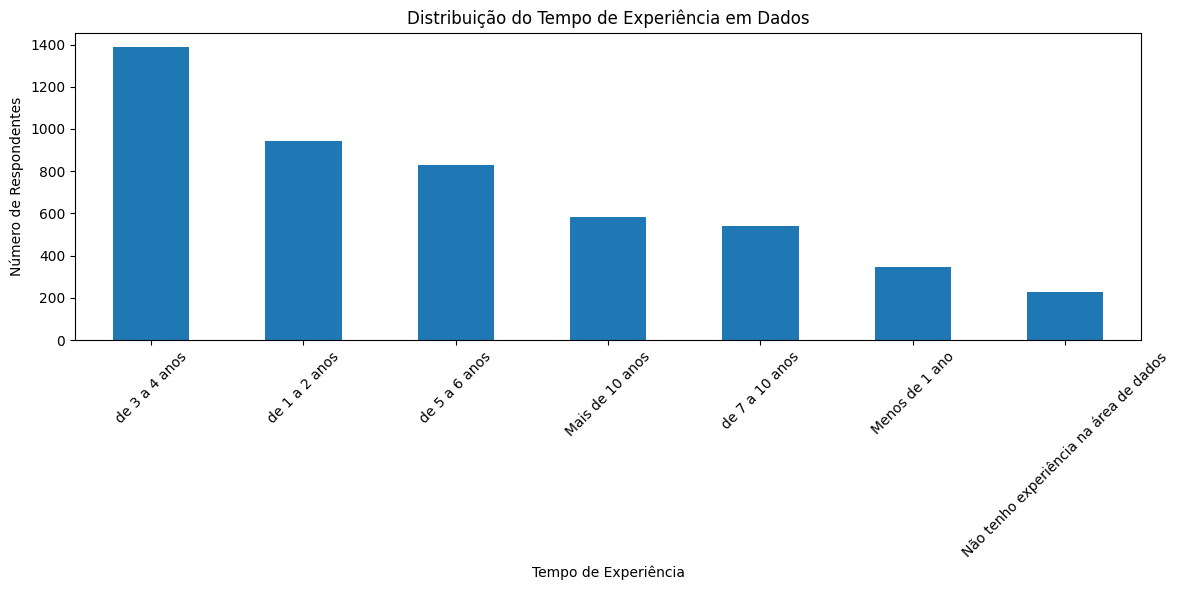

In [5]:
experiencia_counts = df['2.i_tempo_de_experiencia_em_dados'].value_counts()

plt.figure(figsize=(12, 6))
experiencia_counts.plot(kind='bar')
plt.title('Distribuição do Tempo de Experiência em Dados')
plt.xlabel('Tempo de Experiência')
plt.ylabel('Número de Respondentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

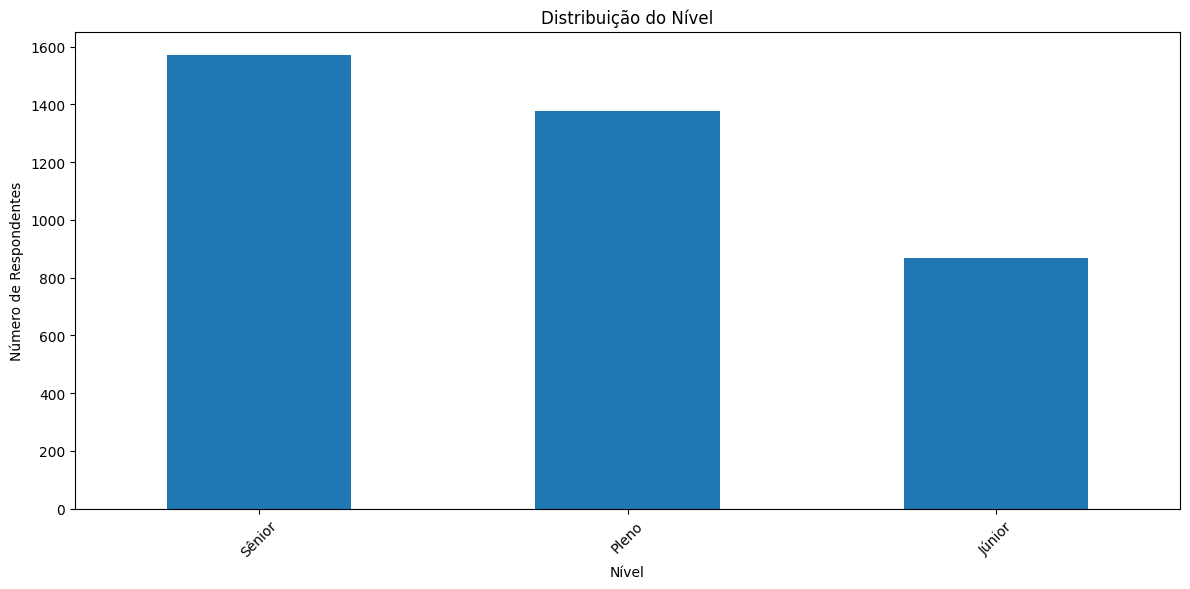

In [6]:
nivel_counts = df['2.g_nivel'].value_counts()
plt.figure(figsize=(12, 6))
nivel_counts.plot(kind='bar')
plt.title('Distribuição do Nível')
plt.xlabel('Nível')
plt.ylabel('Número de Respondentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/p1/vrkk65316532v7sjv657d7pc0000gq/T/ipykernel_85379/3569815656.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tempo de Experiência')


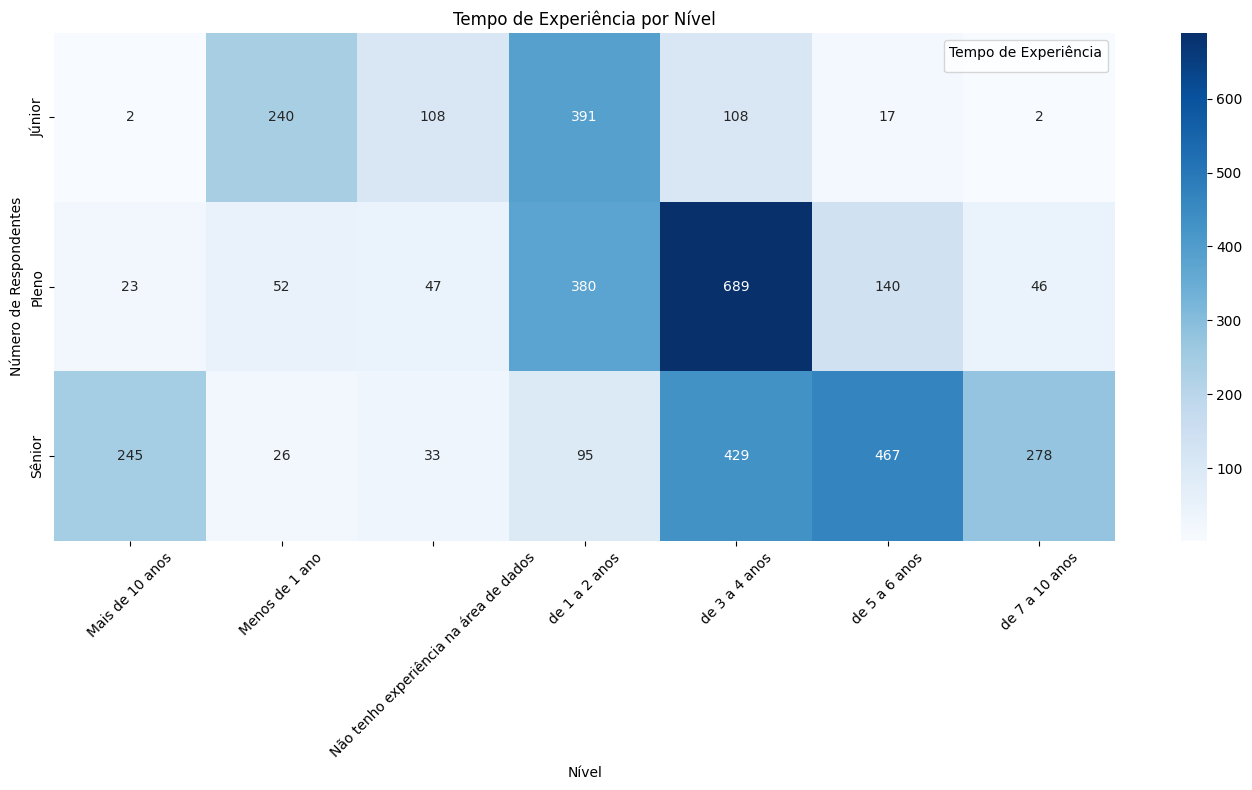

In [7]:
plt.figure(figsize=(14, 8))
sns.heatmap(experiencia_por_nivel, cmap='Blues', annot=True, fmt='d')
plt.title('Tempo de Experiência por Nível')
plt.xlabel('Nível')
plt.ylabel('Número de Respondentes')
plt.xticks(rotation=45)
plt.legend(title='Tempo de Experiência')
plt.tight_layout()

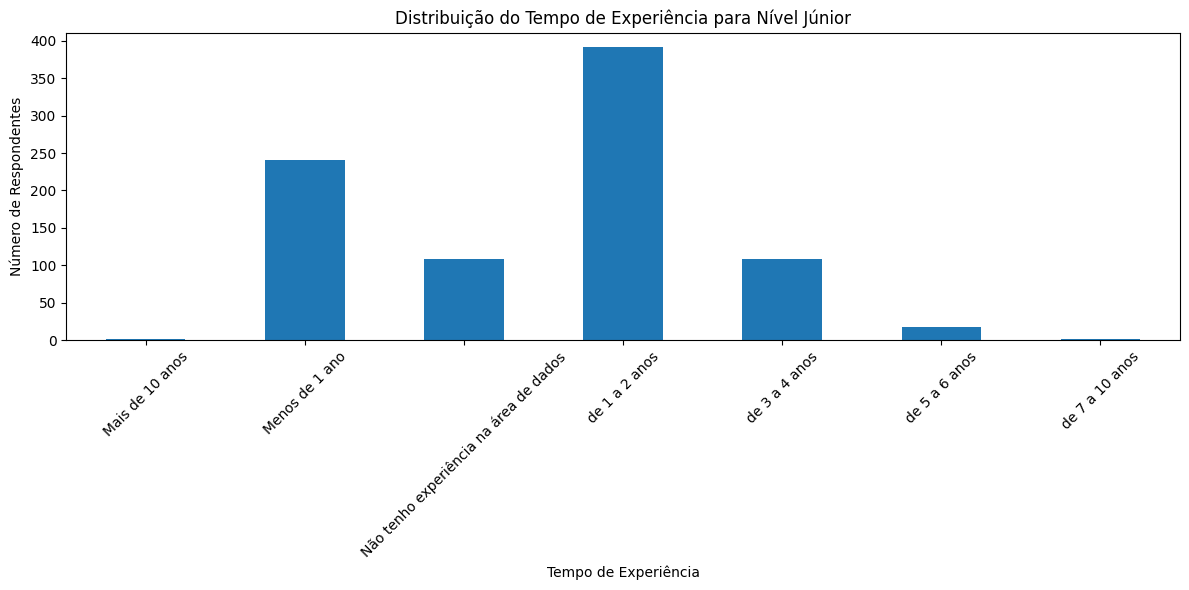

In [8]:
junior_experiencia = experiencia_por_nivel.loc['Júnior']
plt.figure(figsize=(12, 6))
junior_experiencia.plot(kind='bar')
plt.title('Distribuição do Tempo de Experiência para Nível Júnior')
plt.xlabel('Tempo de Experiência')
plt.ylabel('Número de Respondentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
def categorizar_uso_ia(resposta):
    if pd.isna(resposta):
        return 'Não informado'
    elif 'Não utilizo' in resposta:
        return 'Não usa IA'
    elif 'apenas soluções gratuitas' in resposta:
        return 'Usa IA gratuita'
    elif 'pago do meu próprio bolso' in resposta:
        return 'Paga próprio bolso'
    elif 'empresa em que trabalho paga' in resposta:
        return 'Empresa paga'
    elif 'Copilot' in resposta:
        return 'Usa Copilot'
    else:
        return 'Uso misto'


uso_ia_categorizado = df['4.m_usa_chatgpt_ou_copilot_no_trabalho?'].apply(categorizar_uso_ia)
print(uso_ia_categorizado.value_counts())

4.m_usa_chatgpt_ou_copilot_no_trabalho?
Usa IA gratuita       1938
Não informado         1598
Empresa paga           594
Paga próprio bolso     535
Usa Copilot            315
Não usa IA             237
Name: count, dtype: int64


In [10]:
def usa_ia_binario(resposta):
    if pd.isna(resposta):
        return 'Não informado'
    elif 'Não utilizo' in resposta:
        return 'Não usa IA'
    else:
        return 'Usa IA'

uso_ia_binario = df['4.m_usa_chatgpt_ou_copilot_no_trabalho?'].apply(usa_ia_binario)

nivel_vs_ia = pd.crosstab(df['2.g_nivel'], uso_ia_binario)
print("Distribuição de Níveis vs Uso de IA:")
print(nivel_vs_ia)

print("\nPercentuais por nível:")
print(pd.crosstab(df['2.g_nivel'], uso_ia_binario, normalize='index') * 100)

Distribuição de Níveis vs Uso de IA:
4.m_usa_chatgpt_ou_copilot_no_trabalho?  Não informado  Não usa IA  Usa IA
2.g_nivel                                                                 
Júnior                                              93          46     729
Pleno                                               57          91    1229
Sênior                                              49         100    1424

Percentuais por nível:
4.m_usa_chatgpt_ou_copilot_no_trabalho?  Não informado  Não usa IA     Usa IA
2.g_nivel                                                                    
Júnior                                       10.714286    5.299539  83.986175
Pleno                                         4.139434    6.608569  89.251997
Sênior                                        3.115067    6.357279  90.527654


In [11]:
coluna_llm = "8.b.14_Utilizo LLM's para solucionar problemas de negócio."
print(df[coluna_llm].value_counts())


8.b.14_Utilizo LLM's para solucionar problemas de negócio.
0.0    471
1.0    302
Name: count, dtype: int64


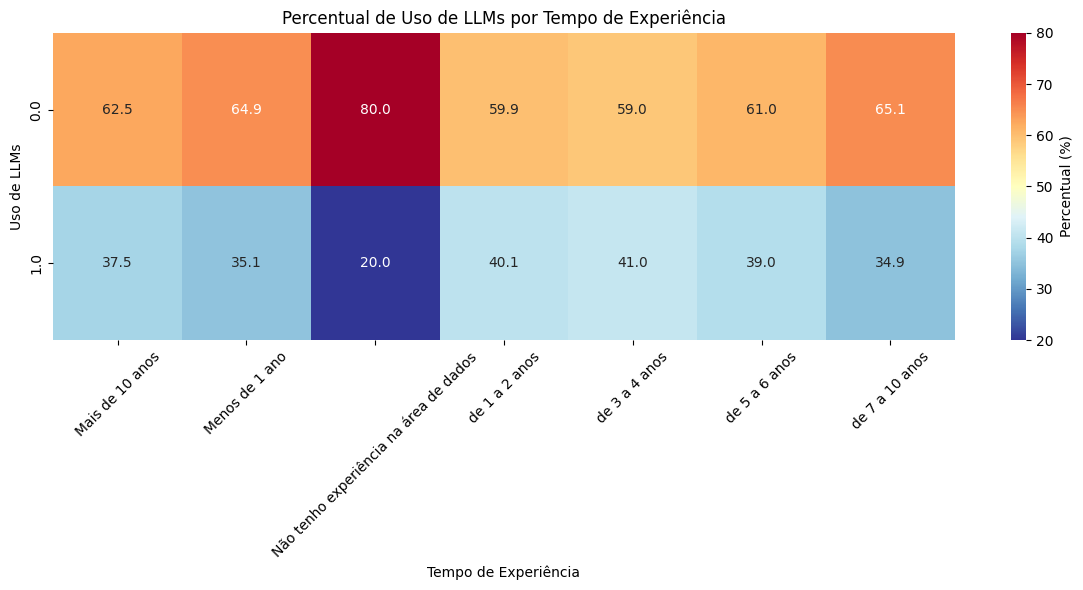

In [16]:
plt.figure(figsize=(12, 6))
usa_ia_por_experiencia_pct = pd.crosstab(df[coluna_llm], df['2.i_tempo_de_experiencia_em_dados'], normalize='columns') * 100

sns.heatmap(usa_ia_por_experiencia_pct, annot=True, fmt='.1f', cmap='RdYlBu_r', cbar_kws={'label': 'Percentual (%)'})
plt.title('Percentual de Uso de LLMs por Tempo de Experiência')
plt.xlabel('Tempo de Experiência')
plt.ylabel('Uso de LLMs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

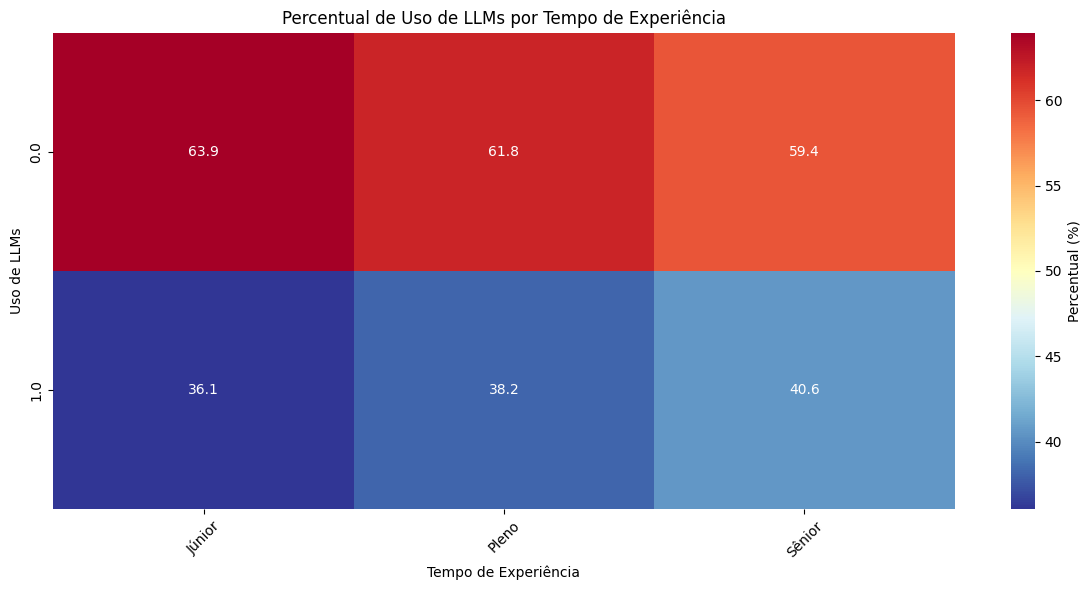

In [17]:
plt.figure(figsize=(12, 6))
usa_ia_por_experiencia_pct = pd.crosstab(df[coluna_llm], df['2.g_nivel'], normalize='columns') * 100

sns.heatmap(usa_ia_por_experiencia_pct, annot=True, fmt='.1f', cmap='RdYlBu_r', cbar_kws={'label': 'Percentual (%)'})
plt.title('Percentual de Uso de LLMs por Tempo de Experiência')
plt.xlabel('Tempo de Experiência')
plt.ylabel('Uso de LLMs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()